# ECS7020P mini-project submission


## What is the problem?

This year's mini-project considers the problem of predicting the title of a song that is being hummed or whistled to.

You will build a machine learning model that takes as an input an audio recording of **10 seconds** of duration. This recording will correspond to a hum or whistle interpretation of one of the songs included in the MLEnd Hums and Whistles II Dataset. The output of the model will be the song label.


## Which dataset will I use?

We have created two subsets of the Hums and Whistles II Dataset. The first one has 400 samples (1.09GB). The second one has 800 samples (2.19 GB), including those already available in the first dataset.

You can download them from:

https://github.com/thekmannn/MLEndHW_Sample/raw/main/MLEndHWII_Sample_400.zip

and

https://github.com/thekmannn/MLEndHW_Sample/raw/main/MLEndHWII_Sample_800.zip





## What will I submit?

Your submission will consist of **one single Jupyter notebook** that should include:

*   **Text cells**, describing in your own words, rigorously and concisely your approach, each implemented step and the results that you obtain,
*   **Code cells**, implementing each step,
*   **Output cells**, i.e. the output from each code cell,

Your notebook **should have the structure** outlined below. Please make sure that you **run all the cells** and that the **output cells are saved** before submission.

Please save your notebook as:

* ECS7020P_miniproject_2526.ipynb


## How will my submission be evaluated?

This submission is worth 16 marks. We will value:

*   Conciseness in your writing.
*   Correctness in your methodology.
*   Correctness in your analysis and conclusions.
*   Completeness.
*   Originality and efforts to try something new.

**The final performance of your solutions will not influence your grade**. We will grade your understanding. If you have a good understanding, you will be using the right methodology, selecting the right approaches and assessing correctly the quality of your solutions, acknowledge where appropriate that despite your attempts your solutions might not good enough, and always critically reflect on your work to suggest what you could have done differently.

Note that **the problem that we are intending to solve is very difficult**. Do not despair if you do not get good results, **difficulty is precisely what makes it interesting** and **worth trying**.

## Show the world what you can do

Why don't you use **GitHub** to manage your project? GitHub can be used as a presentation card that showcases what you have done and gives evidence of your data science skills, knowledge and experience. **Potential employers are always looking for this kind of evidence**.





-------------------------------------- PLEASE USE THE STRUCTURE BELOW THIS LINE --------------------------------------------

## Song Identification from Hummed and Whistled Audio Using Feature-Based Models and Ensemble Learning

## 1 Author

Student Name:`Nepur Chandra Datta`

Student ID:200757618

###  Introduction

The goal of this mini-project is to build a machine-learning system that can
predict the title of a song from a 10-second humming or whistling recording.
The recordings come from the MLEnd Hums and Whistles II dataset, which contains
multiple participants interpreting `eight` well-known songs by either humming or
whistling.

This problem is interesting because:

- the audio is **short** and often noisy,
- different participants hum or whistle with very different pitch, tempo and
  recording conditions,
- and the same song can be interpreted in subtly different melodic ways.

The aim is **not** to reach state-of-the-art accuracy, but to design a **sensible
end-to-end pipeline**, justify the modelling choices, and critically reflect on
limitations and possible improvements.

# 2 Problem formulation

The objective of this project is to identify a song from a brief audio sample that is hummed or whistled. It involves multi-class audio classification. The challenge is further increased because each clip is a human vocal imitation rather than the actual soundtrack.

`We use a one-dimensional waveform to depict every audio sample:`

                     x=[x1,x2,...,xT], where T is the number of audio samples.
Our goal is to develop a classifier that associates one of the eight song labels with this audio signal:
            f_θ(x)=y_pred
            
`The actual label is part of the set:`

         y∈{Feeling,Friend,Happy,Married,Necessities,New York,Remember Me,Try Everything}.

### The reasons this task is challenging

- Significant differences in individual articulation, loudness, tempo, and pitch.

- Variations in noise and microphone quality between recordings.

- The melodic shapes of certain songs are similar.

- The risk of overfitting is increased by the small dataset size (800 samples).

Meaningful structure, such as timbral cues, spectral features, and overall pitch contour, can still be learnt in spite of these difficulties.

12.5% is the chance-level accuracy for 8 classes.
When interpreting the results, this offers a baseline reference.

# 3 Methodology

The general methodology is based on a typical pipeline for supervised learning:

3.1 **Training task**

  The objective is to estimate parameters θ for a classifier f_θ that optimises accuracy on unobserved test recordings. Accuracy and confusion matrices serve as the principal performance measurements.

3.2 **Validation task**
The optimal preprocessing and SVM classifier hyperparameters are chosen using a validation set (9% split). Model selection never makes use of test data.

3.3 **Overall workfolow**

1. **Parsing and data loading**  
   After extracting the `.wav` files from the MLEnd Hums and Whistles II dataset's 800-sample subset, parse the filenames into structured metadata (participant, interpretation type, song label).
   
2. **Preprocessing**
   To normalise recordings, use RMS normalisation to align loudness, cut down on background noise, clip leading and trailing quiet, and resample to a common sampling rate. Important pretreatment hyperparameters are fine-tuned using a small grid search on a stratified subset.
   
3. **Feature extraction**
    Utilise a fixed-length pitch-contour representation, chroma, spectral descriptors, and MFCC-derived acoustic features to generate 250-dimensional vectors from each recording. This provides a comprehensive yet succinct overview of each voice interpretation.

4. **Dataset Development**  
   Construct three interconnected datasets:

   - a **combined dataset** (including all samples),
   - a **humming-only dataset**,
   - and a **whistling-only dataset**.

   The dataset is divided into training (70%), validation (9%), and test (21%) sets using stratification based on song labels.

5. **Model training and hyperparameter search**  
   For each dataset, train a Support Vector Machine classifier utilising a workflow that incorporates standardisation and Principal Component Analysis. A constrained manual hyperparameter search is performed on PCA dimensions, kernel, C, and gamma to determine the optimum model according to validation accuracy.

6. **Ensemble Learning**  
   Upon training the three SVMs, their projected class probabilities from the integrated dataset are consolidated and fed into a logistic regression meta-classifier, which assigns the suitable weights to the three base models.

7. **Evaluation and Assessment**  
   Reports include confusion matrices, test accuracy, per-class accuracy, and classification reports.

# 4 Implemented ML prediction pipelines

The comprehensive prediction pipeline comprises three fundamental stages:

1. A **transformation stage**, during which raw waveforms are preprocessed and converted into fixed-length numerical feature vectors;
2. A **model stage**, during which SVM classifiers are trained on several dataset configurations (mixed, humming-only, whistling-only);
3. An optional **ensemble stage** that integrates the outputs of the three SVMs into a unified prediction.

### 4.1 Transformation Stage

The transformation phase encompasses:

- **Preprocessing**

  - removing nearly silent segments,
  - resampling to a consistent sampling rate (16 kHz or 22.05 kHz),
  - Diminution of light spectrum noise, 
  - RMS-based normalisation of volume.

- **Extraction of features**  
  A 250-dimensional feature vector for each recording created from: - MFCCs and their deltas (mean and standard deviation),
- chromatic properties (standard deviation and mean),
- Roll-off, zero-crossing rate, and spectral contrast;
- a fixed-length pitch contour representation in semitone space.

The goal is to obtain the melodic contour that defines the song as well as timbral information (MFCCs, spectral features) while keeping the dimensionality reasonable for conventional machine learning models.

### 4.2 Model Stage

The chosen basic model for each dataset is a **SVM classifier** integrated into a pipeline:

- Employ `StandardScaler` for centring and scaling features.
- Utilise `PCA` for dimensionality reduction and to mitigate overfitting.
- Support Vector Classifier (SVC) employing kernels (radial basis function, polynomial, or sigmoid) optimised according to validation accuracy.

Support Vector Machines (SVMs) are suitable in this application as they operate efficiently with small to medium-sized datasets and can delineate non-linear decision boundaries in a relatively low-dimensional latent space after Principal Component Analysis (PCA).

Distinct SVMs are trained for:

- the **combined** dataset (all interpretations), 
- the **humming-only** dataset, 
- the **whistling-only** dataset.

This allows each model to concentrate in a unique aspect of the data.

### 4.3 Ensemble Stage

An ensemble with stacks integrates:

- Combined Support Vector Machine

- Humming Support Vector Machine

- Whistling Support Vector Machine

Each produces an 8-class probability vector.
A combination of all three yields a 24-dimensional feature vector for each sample, employed to train a logistic regression classifier.

`What is the justification for utilising an ensemble approach?`

- Humming and whistling models comprise unique acoustic signals.

- The integrated model provides extensive information.

- A weighted ensemble can address individual shortcomings.

# 5 Dataset

The MLEnd Hums and Whistles II dataset's 800-sample subset is used in the tests (https://github.com/thekmannn/MLEndHW_Sample).A brief vocal imitation (whistling or humming) of one of eight songs is represented by each audio file. Filenames use the following format to encode participant ID, interpretation type, attempt number, and song label:

`participantID_interpretationType_interpretationNumber_songName.wav`

For instance: S4_hum_1_TryEverything.wav.

The collection includes 400 recordings of humming and 400 recordings of whistling. Three dataset variants are created once all files have been loaded and parsed into structured AudioSample objects:

- a combined dataset encompassing all 800 samples,
- a dataset only featuring humming,(400 samples)
- and a dataset only comprising whistling (400 samples)
  
To maintain class balance, each dataset is divided using stratified sampling:

| Dataset   | Train | Val | Test |
| --------- | ----- | --- | ---- |
| Combined  | 560   | 72  | 168  |
| Humming   | 280   | 36  | 84   |
| Whistling | 280   | 36  | 84   |

All splits are independent and identically distributed, and evenly distributed among the eight song labels.

Limitations

- The dataset is limited, comprising of 100 samples per song, hence increasing the likelihood of overfitting.
- Numerous clips from the same individual are included across different splits, perhaps resulting in minor identity leaking.
- Inconsistent audio quality among various devices and settings.

### 6 Experiments and Results
The tests on the three dataset variants—combined, humming-only, and whistling-only—as well as the final stacked ensemble model are presented in this section. To produce a clear comparison of their predictive ability, each model was chosen using a validation-based hyperparameter search and assessed using accuracy, per-class metrics, and confusion matrices.

##### 6.1 Experimental Pipeline

`The experiments were conducted using the following workflow:`

- **Load and split data** - Import the 800 audio clips, construct the combined, humming-only, and whistling-only datasets, and generate stratified train-validation-test divides.

- **Tune Preprocessing** - Utilise a compact subset of 60 samples to optimise resampling, trimming, and noise reduction parameters, thereafter applying the selected configuration to all recordings.

- **Extract Features** - Transform each preprocessed clip into a 250-dimensional feature vector that integrates MFCCs, chroma, spectral descriptors, and pitch-contour data.

- **Optimise SVM Model** - For each dataset, conduct an 81-configuration grid search across PCA components, kernel type, C, and γ to identify the optimal SVM pipeline.

- **Train and assess foundational models** - Retrain the chosen SVMs on the complete training datasets and evaluate them on test datasets utilising accuracy, per-class metrics, and confusion matrices.

- **Train and evaluate ensemble model** - Aggregate class-probability outputs from the three SVMs and train a logistic regression meta-classifier, thereafter comparing its performance to each individual SVM.


##### 6.2 SVM Hyperparameter Search

`Each dataset was subjected to a grid search encompassing 81 SVM configurations, varying:`

- PCA dimensions: {30, 50, 70}
- SVM kernels: radial basis function (rbf), polynomial (poly), sigmoid
- Regularisation parameter: C ∈ {0.1, 1, 10}
- Kernel parameter γ: {"scale", "auto", 0.01}
This section outlines the experiments performed on the three dataset variants—combined, humming-only, and whistling-only—and the ultimate ensemble model. All experiments utilised stratified train/validation/test splits (70% / 9% / 21%), with model selection determined by validation accuracy.

`Best validation and test accuracy:`

| Dataset   | Best Val Acc | Test Acc   | Best Hyperparameters             |
| --------- | ------------ | ---------- | -------------------------------- |
| Combined  | **29.17%**   | **20.83%** | PCA=70, C=10, γ=auto, kernel=rbf |
| Humming   | **50.00%**   | **17.86%** | PCA=50, C=1, γ=scale, kernel=rbf |
| Whistling | **33.33%**   | **22.62%** | PCA=50, C=1, γ=0.01, kernel=rbf  |

##### Interpretation

- The humming model attained the highest validation accuracy but experienced a significant decline in test accuracy, signifying substantial overfitting.
- The whistling model exhibited superior generalisation, presumably owing to the cleaner and more stable pitch contours present in the whistling recordings.
- The combined dataset presented the greatest challenge owing to increased variability among interpretation types.

##### 6.3 Final SVM Model Performance

Subsequent to hyperparameter selection, all SVMs were retrained on the whole training datasets and assessed on their respective test sets.

`Key findings`

- Combined SVM (20.83%)
Close to the 12.5% chance baseline. Most classes exhibit low precision and recall, showing high confusion across songs.

- Humming SVM (17.86%)
Strong overfitting: it performs well on validation but poorly on unseen data.
Some labels (“new-york”, “remember-me”) were never predicted.

- Whistling SVM (22.62%)
Best-performing individual model.
The song “happy” reached high recall (73%), while others remained difficult.

`Overall observation` 

`All three SVMs struggle with generalisation due to:`

- Small dataset size
- High inter-subject variability
- Overlapping melodic contours between songs
- No temporal modelling (fixed vectors lose sequence information)

##### 6.4 Ensemble Model Performance

A logistic-regression meta-classifier was trained on the concatenated probability outputs of the three SVMs (24 features per sample).

`Performance comparison`
| Model         | Test Accuracy |
| ------------- | ------------- |
| Combined SVM  | 20.83%        |
| Humming SVM   | 17.86%        |
| Whistling SVM | 22.62%        |
| **Ensemble**  | **22.62%**    |

###### Interpretation

- The ensemble matches the best base model (whistling SVM) but does not outperform it.
- This suggests the models make highly correlated errors, limiting the ensemble’s ability to combine complementary strengths.

`Ensemble weight analysis`

| Base Model | Average Weight Contribution |
| ---------- | --------------------------- |
| Combined   | **1.61**                    |
| Humming    | 0.29                        |
| Whistling  | 0.22                        |

The meta-model relies most heavily on the combined SVM, indicating that this model provides more useful—but still limited—information than the others.

#### 6.5 Per-label Accuracy Analysis

To identify class-specific strengths and weaknesses, per-song accuracies were computed.

`Ensemble per-label accuracy (combined test set)`

- Strongest songs:
married (61.9%), try-everything (42.9%), happy (38.1%)
- Weakest songs:
new-york (0%), remember-me (0%)

##### Interpretation

- Certain melodies are more distinctive or consistently hummed/whistled.
- Difficult labels correspond to songs with flatter or ambiguous melodic contours.
- Model struggles are class-specific, revealing structural dataset limitations.

`Summary`

`The experiments show that:`

- SVMs achieve moderate performance but suffer from overfitting and feature limitations.
- Whistling recordings are more predictable than humming.
- The ensemble offers only marginal improvement because underlying models share the same weaknesses.
- Per-label accuracy reveals which songs are inherently easy or difficult to classify.

###  Imports & Global Configuration
These are the essential libraries necessary for audio loading, preprocessing, feature extraction, visualisation, and machine learning model training. Collectively, they are the basis of the comprehensive audio classification pipeline.

In [354]:
import os
import glob
import re
import zipfile
import urllib.request
from enum import Enum

import numpy as np
import pandas as pd
import librosa
import soundfile as sf
from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
)
from sklearn.linear_model import LogisticRegression

# global config dictionary
config = {}

print("Imports OK.")

Imports OK.


### File Downloader (with Progress Bar)
This supplementary function retrieves files from a specified URL while displaying a real-time progress indicator. It guarantees the reliable retrieval of extensive datasets and offers feedback throughout the download process. The function is subsequently utilised for accessing the audio dataset.

In [356]:
# download file with progress bar 

def download_url(url, save_path, block_size=8192):

    # Open URL
    with urllib.request.urlopen(url) as dl_file:

        total_size = int(dl_file.getheader("Content-Length", 0))

        # Write file with progress bar
        with open(save_path, "wb") as out_file, tqdm(
            total=total_size,
            unit="B",
            unit_scale=True,
            desc="Downloading",
        ) as pbar:

            while True:
                data = dl_file.read(block_size)
                if not data:
                    break

                out_file.write(data)
                pbar.update(len(data))

    return save_path

### Download & Extract Dataset
This part retrieves the compressed 800-sample audio dataset from GitHub and decompresses all files into a local directory structure. The script efficiently manages absent or previously downloaded files, guaranteeing the dataset is perpetually prepared for subsequent analysis.

In [359]:
#  Download & unzip the 800-sample dataset

base_dir = "./dataset"
os.makedirs(base_dir, exist_ok=True)

zip_name = "MLEndHWII_Sample_800.zip"
zip_path = os.path.join(base_dir, zip_name)
url = f"https://github.com/thekmannn/MLEndHW_Sample/raw/main/{zip_name}"

print("=" * 60)
print(f"Dataset directory: {base_dir}")
print("=" * 60)

# Download only if file is missing
if os.path.exists(zip_path) and os.path.getsize(zip_path) > 0:
    print(f"Zip file already exists, skipping download: {zip_path}")
else:
    print(f"Downloading dataset from:\n  {url}")
    print(f"Saving to: {zip_path}")
    download_url(url, zip_path)

# Unzip dataset
extract_dir = os.path.join(base_dir, "samples")
os.makedirs(extract_dir, exist_ok=True)

print("=" * 60)
try:
    with zipfile.ZipFile(zip_path, "r") as zf:
        zf.extractall(extract_dir)
    print(f"Archive extracted: {zip_path} → {extract_dir}")
except zipfile.BadZipFile:
    print("Error: bad zip file.")
except Exception as e:
    print("Extraction failed:", e)

print("=" * 60)
print("Contents of extract_dir:", os.listdir(extract_dir))

Dataset directory: ./dataset
Zip file already exists, skipping download: ./dataset\MLEndHWII_Sample_800.zip
Archive extracted: ./dataset\MLEndHWII_Sample_800.zip → ./dataset\samples
Contents of extract_dir: ['MLEndHWII_sample_800']


### AudioSample Class – Structured Filename Parsing
This class analyses each audio files to extract significant elements, including participant ID, interpretation type (hum or whistle), and song title. It mandates a rigorous naming convention to guarantee that all recordings are uniformly identified and labelled prior to subsequent processing.

In [288]:
#  AudioSample class to parse filenames 

class AudioSample:
    # Type of interpretation (hum or whistle)
    class InterpretationType(Enum):
        HUM = "hum"
        WHISTLE = "whistle"

    # Allowed song labels in kebab-case
    class Song(Enum):
        FEELING = "feeling"
        FRIEND = "friend"
        HAPPY = "happy"
        MARRIED = "married"
        NECESSITIES = "necessities"
        NEW_YORK = "new-york"
        REMEMBER_ME = "remember-me"
        TRY_EVERYTHING = "try-everything"

    def __init__(self, sample_path: str):
        self.path = sample_path
        self.file_name = os.path.basename(sample_path)

        # Validate filename (must follow <id>_<type>_<num>_<song>.wav)
        pattern = r'^[A-Za-z0-9]+_[A-Za-z]+_[0-9]+_[A-Za-z][A-Za-z0-9]*(?:\.[Ww][Aa][Vv])?$'
        if not re.match(pattern, self.file_name):
            raise ValueError(f"Unexpected file name format: {self.file_name}")

        # Remove extension and split parts
        name_no_ext = re.sub(r'\.[Ww][Aa][Vv]$', '', self.file_name)
        parts = name_no_ext.split("_")

        # Extract parsed components
        self.participant_id = parts[0].lower()
        self.interpretation_type = self._parse_interpretation_type(parts[1])
        self.interpretation_number = parts[2].lower()
        self.song = self._parse_song(parts[3])

    def _parse_interpretation_type(self, text: str):
        # Convert to enum (hum / whistle)
        text = text.lower()
        try:
            return self.InterpretationType(text)
        except ValueError:
            raise ValueError(f"Invalid interpretation type: {text}")

    def _parse_song(self, camel: str):
        # Convert CamelCase → kebab-case for enum lookup
        kebab = ""
        for ch in camel:
            if ch.isupper():
                kebab += "-" + ch.lower()
            else:
                kebab += ch

        kebab = kebab.lstrip("-").lower()

        # Map to Song enum
        try:
            return self.Song(kebab)
        except ValueError:
            valid = [s.value for s in self.Song]
            raise ValueError(f"Invalid song name '{camel}'. Expected one of {valid}.")

### Collecting All .wav Files and Wrapping Them as AudioSample Objects
This component locates every `.wav` audio file inside the retrieved dataset and transforms each file into a `AudioSample` object. Filenames that deviate from the anticipated pattern are recorded and omitted, hence maintaining organised and coherent information for the complete dataset.

In [291]:
# Collect all .wav files and wrap in AudioSample 

# Find all .wav files in the extracted dataset
wav_pattern = os.path.join(extract_dir, "**", "*.wav")
file_paths = glob.glob(wav_pattern, recursive=True)

print("=" * 60)
print(f"Total .wav files found: {len(file_paths)}")
print("=" * 60)

audio_samples = []
bad_files = []

# Create AudioSample objects for each file
for fp in sorted(file_paths):
    try:
        sample = AudioSample(fp)
        audio_samples.append(sample)
    except Exception as e:
        # Files with invalid names or patterns go here
        print(f"Skipping file (bad name?): {fp} -> {e}")
        bad_files.append((fp, e))

print(f"Valid AudioSample objects created: {len(audio_samples)}")

Total .wav files found: 800
Valid AudioSample objects created: 800


### Load Raw Audio Signals into Memory
All valid audio files are now loaded into memory as raw waveforms along with their sample rates and associated metadata. This step ensures that the full dataset is ready for preprocessing, feature extraction, and later model training.

In [294]:
#  Load raw audio signals into memory 

audio_data = []  # (signal, sample_rate, AudioSample)

# Read each audio file
for sample in tqdm(audio_samples, desc="Loading audio"):
    try:
        signal, sr = librosa.load(sample.path, sr=None, mono=True)
        audio_data.append((signal, sr, sample))
    except Exception as e:
        print(f"Could not read file {sample.path}: {e}")

print("=" * 60)
print(f"Total audio files successfully loaded: {len(audio_data)}")
print("=" * 60)

# Extract song labels for stats
labels_all = np.array([entry[2].song.value for entry in audio_data])
unique_labels, counts = np.unique(labels_all, return_counts=True)

print("Song distribution (loaded data):")
for lab, c in zip(unique_labels, counts):
    print(f"  {lab:15s}: {c}")

Loading audio: 100%|██████████| 800/800 [00:19<00:00, 41.22it/s]

Total audio files successfully loaded: 800
Song distribution (loaded data):
  feeling        : 100
  friend         : 100
  happy          : 100
  married        : 100
  necessities    : 100
  new-york       : 100
  remember-me    : 100
  try-everything : 100


### Preprocessing Class
This class implements an exhaustive audio-cleaning pipeline, encompassing resampling, silence cutting, noise reduction, and RMS loudness normalisation. The objective is to standardise all recordings prior to feature extraction, ensuring that models learn from uniform, high-quality inputs.

In [297]:
#  Preprocessing class 

class AudioPreprocessor:

    def __init__(
        self,
        target_sample_rate: int = 16_000,
        target_rms_level: float = 0.1,
        trim_db: float = 20.0,
        noise_reduction_strength: float = 0.1,
    ):
        # Preprocessing parameters
        self.target_sample_rate = target_sample_rate
        self.target_rms_level = target_rms_level
        self.trim_db = trim_db
        self.noise_reduction_strength = noise_reduction_strength

    def __call__(self, signal: np.ndarray, sr: int):
        # Apply full preprocessing pipeline
        signal, sr = self._resample(signal, sr)
        signal = self._trim_silence(signal)
        signal = self._reduce_noise(signal, sr)
        signal = self._normalise_rms(signal)
        return signal, sr

    # 1. Resample audio
    def _resample(self, signal, sr):
        if sr == self.target_sample_rate:
            return signal, sr
        signal_rs = librosa.resample(signal, orig_sr=sr, target_sr=self.target_sample_rate)
        return signal_rs, self.target_sample_rate

    # 2. Trim leading/trailing silence
    def _trim_silence(self, signal):
        trimmed, _ = librosa.effects.trim(signal, top_db=self.trim_db)
        return trimmed

    # 3. Noise reduction (uses noisereduce if available)
    def _reduce_noise(self, signal, sr):
        if self.noise_reduction_strength <= 0:
            return signal

        try:
            import noisereduce as nr
            return nr.reduce_noise(
                y=signal,
                sr=sr,
                prop_decrease=self.noise_reduction_strength,
            )
        except Exception:
            # Fallback: simple spectral gating
            frame_len = 2048
            hop = 512
            S = np.abs(librosa.stft(signal, n_fft=frame_len, hop_length=hop))
            S_med = np.median(S, axis=1, keepdims=True)
            mask = S > S_med
            S_clean = S * mask
            signal_clean = librosa.istft(S_clean, hop_length=hop, length=len(signal))
            return signal_clean

    # 4. Normalise RMS loudness
    def _normalise_rms(self, signal):
        rms = np.sqrt(np.mean(signal ** 2) + 1e-12)
        if rms == 0:
            return signal

        scaled = signal * (self.target_rms_level / rms)

        # Avoid clipping
        max_abs = np.max(np.abs(scaled))
        if max_abs > 1.0:
            scaled = scaled / max_abs

        return scaled

### Small Preprocessing Hyperparameter Search (~60 Samples)
A small stratified subset of approximately 60 recordings is generated to enhance the efficiency of preprocessing optimisation. This subset preserves the original class distribution and is utilised for the rapid assessment of preprocessing configurations without executing on the complete dataset.

In [299]:
# Small preprocessing hyperparameter search on ~60 samples 

print("=" * 60)
print("Building small optimisation subset for preprocessing search...")
print("=" * 60)

# Select up to 60 samples for quick experimentation
subset_size = min(60, len(audio_data))
indices = np.arange(len(audio_data))

# Stratified sample to preserve label distribution
opt_indices, _ = train_test_split(
    indices,
    train_size=subset_size,
    stratify=labels_all,
    random_state=42,
)

# Build optimisation subset
optimisation_subset = [audio_data[i] for i in opt_indices]
opt_labels = labels_all[opt_indices]

print(f"Optimisation subset size: {len(optimisation_subset)}")
print("Class distribution in subset:", np.unique(opt_labels, return_counts=True))
print("=" * 60)

Building small optimisation subset for preprocessing search...
Optimisation subset size: 60
Class distribution in subset: (array(['feeling', 'friend', 'happy', 'married', 'necessities', 'new-york',
       'remember-me', 'try-everything'], dtype='<U14'), array([8, 8, 7, 7, 7, 8, 7, 8], dtype=int64))


### Function to Evaluate Preprocessing Hyperparameters
This function implements a designated preprocessing configuration on a selection of audio samples, extracts streamlined MFCC-based feature vectors, and trains a basic PCA+SVM model. The resultant validation accuracy is utilised to compare various preprocessing configurations.

`MFCC features` are utilised here because to their ability to offer a concise, perceptually significant representation of the audio spectrum, encapsulating the overall melodic contour while minimising noise and extraneous fluctuation.This provides them appropriate for swiftly assessing the efficacy of various preprocessing options in maintaining valuable musical information.

In [302]:
def evaluate_preprocessing_params(
    audio_subset,
    target_sample_rate,
    target_rms_level,
    trim_db,
    noise_reduction_strength,
    test_size=0.25,
    random_state=42,
):

    # Build a preprocessor with the given hyperparameters
    local_pre = AudioPreprocessor(
        target_sample_rate=target_sample_rate,
        target_rms_level=target_rms_level,
        trim_db=trim_db,
        noise_reduction_strength=noise_reduction_strength,
    )

    processed = []
    labels = []

    # Apply preprocessing to each sample
    for sig, sr, meta in audio_subset:
        proc_sig, proc_sr = local_pre(sig, sr)
        processed.append((proc_sig, proc_sr))
        labels.append(meta.song.value)

    labels = np.array(labels)

    # Extract simple MFCC feature vectors
    feats = []
    for sig, sr in processed:
        mfcc = librosa.feature.mfcc(
            y=sig,
            sr=sr,
            n_mfcc=20,
            n_fft=2048,
            hop_length=512,
        )
        feats.append(
            np.concatenate([mfcc.mean(axis=1), mfcc.std(axis=1)])
        )

    X = np.vstack(feats)

    # Train/validation split
    X_train, X_val, y_train, y_val = train_test_split(
        X,
        labels,
        test_size=test_size,
        random_state=random_state,
        stratify=labels,
    )

    # Limit PCA dimension so it's valid for small datasets
    n_eff = min(20, X_train.shape[1] - 1)

    # Standardize → PCA → SVM pipeline
    pipe = Pipeline(
        [
            ("scaler", StandardScaler()),
            ("pca", PCA(n_components=n_eff, random_state=random_state)),
            ("svc", SVC(kernel="rbf", C=1.0, gamma="scale", random_state=random_state)),
        ]
    )

    pipe.fit(X_train, y_train)
    acc = pipe.score(X_val, y_val)
    return float(acc)

### Grid Search for Preprocessing Hyperparameters
A minor grid search is conducted to determine the optimal preprocessing configurations. Each parameter combination is assessed utilising the subset from Section 8, and the configuration that attains the highest validation accuracy is chosen for comprehensive dataset preprocessing.

In [305]:
from itertools import product

# Hyperparameter ranges for preprocessing
param_grid = {
    "target_sample_rate": [16_000, 22_050],
    "target_rms_level": [0.1],
    "trim_db": [20.0, 30.0],
    "noise_reduction_strength": [0.1, 0.25],
}

print("=" * 60)
print("Preprocessing parameter grid:")
for k, v in param_grid.items():
    print(f"  {k}: {v}")

total_combos = np.prod([len(v) for v in param_grid.values()])
print(f"Total combinations to test: {total_combos}")
print("=" * 60)

best_accuracy = 0.0
best_params = {}
results = []

print("Starting grid search for preprocessing parameters...")

# Expand dictionary grid → list of all parameter combinations
combinations = list(
    product(
        param_grid["target_sample_rate"],
        param_grid["target_rms_level"],
        param_grid["trim_db"],
        param_grid["noise_reduction_strength"],
    )
)

# Test each combination
for sr, rms, trim, noise in tqdm(combinations, desc="Testing combinations"):
    try:
        acc = evaluate_preprocessing_params(
            audio_subset=optimisation_subset,
            target_sample_rate=sr,
            target_rms_level=rms,
            trim_db=trim,
            noise_reduction_strength=noise,
            test_size=0.25,
            random_state=42,
        )

        results.append(
            {
                "target_sample_rate": sr,
                "target_rms_level": rms,
                "trim_db": trim,
                "noise_reduction_strength": noise,
                "accuracy": acc,
            }
        )

        # Track best configuration
        if acc > best_accuracy:
            best_accuracy = acc
            best_params = {
                "target_sample_rate": sr,
                "target_rms_level": rms,
                "trim_db": trim,
                "noise_reduction_strength": noise,
            }

    except Exception as e:
        print(f"Error for ({sr}, {rms}, {trim}, {noise}): {e}")

print("=" * 60)
print("Grid search complete.")
print(f"Best validation accuracy: {best_accuracy:.4f} ({best_accuracy*100:.2f}%)")
print("Best preprocessing parameters:")
for k, v in best_params.items():
    print(f"  {k}: {v}")
print("=" * 60)

# Fallback in case every run failed
if not best_params:
    print("No valid configuration found, falling back to manual defaults.")
    best_params = {
        "target_sample_rate": 16_000,
        "target_rms_level": 0.1,
        "trim_db": 20.0,
        "noise_reduction_strength": 0.1,
    }

Preprocessing parameter grid:
  target_sample_rate: [16000, 22050]
  target_rms_level: [0.1]
  trim_db: [20.0, 30.0]
  noise_reduction_strength: [0.1, 0.25]
Total combinations to test: 8
Starting grid search for preprocessing parameters...


Testing combinations: 100%|██████████| 8/8 [04:05<00:00, 30.69s/it]

Grid search complete.
Best validation accuracy: 0.2667 (26.67%)
Best preprocessing parameters:
  target_sample_rate: 16000
  target_rms_level: 0.1
  trim_db: 20.0
  noise_reduction_strength: 0.25


### Apply Best Preprocessing Settings to the Full Dataset
Following the determination of the ideal preprocessing parameters, these are used to transform the entire dataset parameters. This stage guarantees that every audio recording has the same sampling rate, volume level, threshold for trimming and noise reduction intensity. This method of standardising the audio enhances the dependability of feature extraction downstream and offers a more consistent, clean input for allmodels for machine learning are being developed.

In [307]:
#  Apply best preprocessing to full dataset

# Store chosen preprocessing configuration
config["preprocessing"] = {
    "target_sample_rate": best_params["target_sample_rate"],
    "target_rms_level": best_params["target_rms_level"],
    "trim_db": best_params["trim_db"],
    "noise_reduction_strength": best_params["noise_reduction_strength"],
    "optimisation_accuracy": best_accuracy,
}

print("=" * 60)
print("Using optimised preprocessing parameters:")
for k, v in config["preprocessing"].items():
    if k != "optimisation_accuracy":
        print(f"  {k}: {v}")
print(f"Validation accuracy during search: {best_accuracy:.4f}")
print("=" * 60)

# Build preprocessor with best settings
preprocessor = AudioPreprocessor(
    target_sample_rate=config["preprocessing"]["target_sample_rate"],
    target_rms_level=config["preprocessing"]["target_rms_level"],
    trim_db=config["preprocessing"]["trim_db"],
    noise_reduction_strength=config["preprocessing"]["noise_reduction_strength"],
)

preprocessed_audio_data = []

# Apply preprocessing to every sample in the dataset
for signal, sr, meta in tqdm(audio_data, desc="Preprocessing full dataset"):
    proc_signal, proc_sr = preprocessor(signal, sr)
    preprocessed_audio_data.append((proc_signal, proc_sr, meta))

print("=" * 60)
print(f"Preprocessed samples: {len(preprocessed_audio_data)}")

# Compute max duration after preprocessing
max_len = max(len(s[0]) for s in preprocessed_audio_data)
max_dur = max_len / config["preprocessing"]["target_sample_rate"]
print(f"Max length after preprocessing: {max_len} samples ({max_dur:.2f} s)")
print("=" * 60)

Using optimised preprocessing parameters:
  target_sample_rate: 16000
  target_rms_level: 0.1
  trim_db: 20.0
  noise_reduction_strength: 0.25
Validation accuracy during search: 0.2667


Preprocessing full dataset: 100%|██████████| 800/800 [05:00<00:00,  2.66it/s]

Preprocessed samples: 800
Max length after preprocessing: 590336 samples (36.90 s)


### Feature Extraction Class (250-Dimensional Vectors)
This class generates a rich feature representation for each audio signal by
combining MFCCs, chroma features, spectral statistics, and a detailed
pitch-contour profile. `MFCCs` are included because they provide a compact,
perceptually-motivated summary of the audio spectrum: they reduce waveform
complexity, capture the spectral envelope (timbre/melodic shape), and are widely
used in speech and music analysis. Together, these features form a
250-dimensional vector that offers a stable and informative basis for
distinguishing between different hummed or whistled melodies, and serves as the
input to all machine-learning models in the pipeline.

In [309]:
#  Feature extraction class 

class AudioFeatureExtractor:

    def __init__(
        self,
        n_mfcc: int = 20,
        n_chroma: int = 12,
        n_fft: int = 2048,
        hop_length: int = 512,
        pitch_contour_steps: int = 64,
    ):
        # Core feature extraction parameters
        self.n_mfcc = n_mfcc
        self.n_chroma = n_chroma
        self.n_fft = n_fft
        self.hop_length = hop_length
        self.pitch_contour_steps = pitch_contour_steps

    def extract_audio_features(self, y: np.ndarray, sr: int) -> np.ndarray:
        # Ensure numpy array
        y = np.asarray(y, dtype=np.float64)

        # Enforce minimum duration for stable features
        min_duration = 2.0
        min_len = int(min_duration * sr)
        if len(y) < min_len:
            y = np.pad(y, (0, min_len - len(y)), mode="reflect")

        # Harmonic component for music-oriented features
        y_harm, _ = librosa.effects.hpss(y)

        feats = []

        # MFCC and delta-MFCC
        mfcc = librosa.feature.mfcc(
            y=y_harm,
            sr=sr,
            n_mfcc=self.n_mfcc,
            n_fft=self.n_fft,
            hop_length=self.hop_length,
        )
        mfcc_delta = librosa.feature.delta(mfcc)

        # Summary statistics for MFCC-related features
        for mat in (mfcc, mfcc_delta):
            feats.extend(mat.mean(axis=1))
            feats.extend(mat.std(axis=1))

        # Chroma features
        chroma = librosa.feature.chroma_cqt(y=y_harm, sr=sr)
        feats.extend(chroma.mean(axis=1))
        feats.extend(chroma.std(axis=1))

        # Spectral contrast
        contrast = librosa.feature.spectral_contrast(
            y=y_harm,
            sr=sr,
            n_fft=self.n_fft,
            hop_length=self.hop_length,
        )
        feats.extend(contrast.mean(axis=1))
        feats.extend(contrast.std(axis=1))

        # Spectral rolloff
        rolloff = librosa.feature.spectral_rolloff(
            y=y_harm,
            sr=sr,
            n_fft=self.n_fft,
            hop_length=self.hop_length,
        )
        feats.append(rolloff.mean())
        feats.append(rolloff.std())

        # Zero-crossing rate
        zcr = librosa.feature.zero_crossing_rate(y, hop_length=self.hop_length)
        feats.append(zcr.mean())
        feats.append(zcr.std())

        return np.array(feats, dtype=np.float64)

    def pitch_contour_features(self, y: np.ndarray, sr: int) -> np.ndarray:
        # Handle empty arrays safely
        y = np.asarray(y, dtype=np.float32)
        if len(y) == 0:
            return np.zeros(self.pitch_contour_steps * 2, dtype=np.float32)

        # Limit duration to reduce pitch estimation noise
        max_duration = 4.0
        max_len = int(max_duration * sr)
        if len(y) > max_len:
            start = (len(y) - max_len) // 2
            y = y[start : start + max_len]

        # Harmonic separation helps pitch detection
        y_harm, _ = librosa.effects.hpss(y)

        # F0 estimation via YIN
        try:
            f0 = librosa.yin(
                y_harm,
                fmin=80,
                fmax=800,
                sr=sr,
                frame_length=1024,
                hop_length=self.hop_length,
            )
        except Exception:
            return np.zeros(self.pitch_contour_steps * 2, dtype=np.float32)

        # Remove zeros (unvoiced frames)
        f0 = f0[f0 > 0]
        if len(f0) == 0:
            return np.zeros(self.pitch_contour_steps * 2, dtype=np.float32)

        # Convert to MIDI and normalise to median
        midi = 69 + 12 * np.log2(f0 / 440.0)
        midi_center = midi - np.median(midi)

        # Resample contour to fixed length
        idx = np.linspace(0, len(midi_center) - 1, num=self.pitch_contour_steps)
        contour = np.interp(idx, np.arange(len(midi_center)), midi_center)

        # Pitch intervals
        intervals = np.diff(contour, prepend=contour[0])

        return np.concatenate([contour, intervals]).astype(np.float32)

    def extract_full_features(self, y: np.ndarray, sr: int) -> np.ndarray:
        # Combine spectral features + pitch contour
        base = self.extract_audio_features(y, sr)
        contour = self.pitch_contour_features(y, sr)
        return np.concatenate([base, contour])

### Extract Features for All Recordings
The feature extractor converts each preprocessed audio sample into a 250-dimensional feature vector. These vectors, which offer a reliable and comprehensive representation of each recording, serve as the primary input dataset for all SVM and ensemble models.

In [312]:
# Extract features for all recordings 

feature_extractor = AudioFeatureExtractor()

print("=" * 60)
print("Extracting 250-dimensional feature vectors...")
print("=" * 60)

X_combined = []
y_combined = []

# Extract full feature vector for each preprocessed sample
for sig, sr, meta in tqdm(preprocessed_audio_data, desc="Feature extraction"):
    feats = feature_extractor.extract_full_features(sig, sr)
    X_combined.append(feats)
    y_combined.append(meta.song.value)

# Convert to arrays for model training
X_combined = np.vstack(X_combined)
y_combined = np.array(y_combined)

print("Feature matrix shape:", X_combined.shape)
print("Label vector shape:", y_combined.shape)

Extracting 250-dimensional feature vectors...


Feature extraction: 100%|██████████| 800/800 [34:46<00:00,  2.61s/it]

Feature matrix shape: (800, 250)
Label vector shape: (800,)


###  Build Combined, Humming-Only and Whistling-Only Datasets
The entire feature set is divided into three views: two specialist subsets that only contain whistling or humming samples, and a composite dataset that includes all recordings. This division enables the pipeline to train interpretation-specific SVM models that are better able to capture the distinctive features of humming and whistling performances, as well as a generic classifier on all data.

In [314]:
# Separate indices by interpretation type
hum_indices = [
    i for i, (_, _, meta) in enumerate(preprocessed_audio_data)
    if meta.interpretation_type.value == "hum"
]

whistle_indices = [
    i for i, (_, _, meta) in enumerate(preprocessed_audio_data)
    if meta.interpretation_type.value == "whistle"
]

# Extract feature/label subsets
X_hum = X_combined[hum_indices]
y_hum = y_combined[hum_indices]

X_whistle = X_combined[whistle_indices]
y_whistle = y_combined[whistle_indices]

print("=" * 60)
print("Dataset shapes:")
print(f"Combined:  X={X_combined.shape}, y={y_combined.shape}")
print(f"Humming:   X={X_hum.shape}, y={y_hum.shape}")
print(f"Whistling: X={X_whistle.shape}, y={y_whistle.shape}")
print("=" * 60)

Dataset shapes:
Combined:  X=(800, 250), y=(800,)
Humming:   X=(400, 250), y=(400,)
Whistling: X=(400, 250), y=(400,)


### Train/Validation/Test Splits (70/9/21) for Each Dataset
Stratified sampling is used to divide each dataset—combined, humming-only, and whistling-only—into training, validation, and test sets. This maintains the class distribution throughout all splits and facilitates an impartial and uniform assessment of every model.

In [317]:
# Train/val/test splits (70/9/21) for each dataset 

def stratified_splits(X, y, test_size=0.21, val_size=0.09, random_state=0):
    # First split: train vs (val + test)
    X_train, X_temp, y_train, y_temp = train_test_split(
        X, y,
        test_size=(test_size + val_size),
        stratify=y,
        random_state=random_state,
    )

    # Split temp into validation and test
    relative_val = val_size / (test_size + val_size)
    X_test, X_val, y_test, y_val = train_test_split(
        X_temp, y_temp,
        test_size=relative_val,
        stratify=y_temp,
        random_state=random_state,
    )

    return X_train, y_train, X_val, y_val, X_test, y_test


# Apply splits to all three datasets
Xc_tr, yc_tr, Xc_val, yc_val, Xc_te, yc_te = stratified_splits(X_combined, y_combined)
Xh_tr, yh_tr, Xh_val, yh_val, Xh_te, yh_te = stratified_splits(X_hum, y_hum)
Xw_tr, yw_tr, Xw_val, yw_val, Xw_te, yw_te = stratified_splits(X_whistle, y_whistle)

datasets = {
    "combined": {
        "train": (Xc_tr, yc_tr),
        "val":   (Xc_val, yc_val),
        "test":  (Xc_te, yc_te),
    },
    "humming": {
        "train": (Xh_tr, yh_tr),
        "val":   (Xh_val, yh_val),
        "test":  (Xh_te, yh_te),
    },
    "whistling": {
        "train": (Xw_tr, yw_tr),
        "val":   (Xw_val, yw_val),
        "test":  (Xw_te, yw_te),
    },
}

# Print dataset sizes for all three subsets
for name, d in datasets.items():
    n = (
        d["train"][0].shape[0]
        + d["val"][0].shape[0]
        + d["test"][0].shape[0]
    )
    print("=" * 60)
    print(f"{name.upper()} dataset sizes (total {n}):")
    print(f"  Train: {d['train'][0].shape[0]}")
    print(f"  Val:   {d['val'][0].shape[0]}")
    print(f"  Test:  {d['test'][0].shape[0]}")
print("=" * 60)

COMBINED dataset sizes (total 800):
  Train: 560
  Val:   72
  Test:  168
HUMMING dataset sizes (total 400):
  Train: 280
  Val:   36
  Test:  84
WHISTLING dataset sizes (total 400):
  Train: 280
  Val:   36
  Test:  84


### SVM Model Selection with Full Hyperparameter Logging
Each dataset (combined, humming, and whistling) undergoes a thorough grid search over SVM + PCA hyperparameters in this step. It now logs validation accuracy for each attempted configuration in addition to tracking the best model, allowing for future analysis or plotting of the search space.

In [320]:
# SVM model selection 

from itertools import product

# Hyperparameter grid for SVM + PCA
svm_search_space = {
    "n_components": [30, 50, 70],
    "C": [0.1, 1.0, 10.0],
    "gamma": ["scale", "auto", 0.01],
    "kernel": ["rbf", "poly", "sigmoid"],
}

svm_combos = list(product(
    svm_search_space["n_components"],
    svm_search_space["C"],
    svm_search_space["gamma"],
    svm_search_space["kernel"],
))

print("=" * 60)
print(f"SVM configurations per dataset: {len(svm_combos)}")
print("=" * 60)

config.setdefault("svm_models", {})
svm_models = {}

# NEW: to store all hyperparameter trials for plotting later
svm_search_results = {}

def run_svm_search(X_train, y_train, X_val, y_val, X_test, y_test, label):
    best_val_acc = 0.0
    best_pipe = None
    best_cfg = None

    # store every tried combination and its validation accuracy
    records = []

    print("\n" + "=" * 60)
    print(f"SVM model selection for: {label}")
    print(f"Train size: {X_train.shape[0]}, Val size: {X_val.shape[0]}")
    print("=" * 60)

    # Exhaustive search over SVM hyperparameters
    for (n_comp, C, gamma, kernel) in tqdm(svm_combos, desc=f"SVM search ({label})"):
        # Ensure PCA dimension is valid for the dataset
        n_eff = min(n_comp, X_train.shape[1] - 1)

        pipe = Pipeline([
            ("scaler", StandardScaler()),
            ("pca", PCA(n_components=n_eff, random_state=0)),
            ("svc", SVC(
                kernel=kernel,
                C=C,
                gamma=gamma,
                probability=True,
                random_state=0,
            )),
        ])

        try:
            pipe.fit(X_train, y_train)
            y_val_pred = pipe.predict(X_val)
            val_acc = accuracy_score(y_val, y_val_pred)

            # log this configuration
            records.append({
                "n_components": n_eff,
                "C": C,
                "gamma": gamma,
                "kernel": kernel,
                "val_accuracy": val_acc,
            })

            # Track best model based on validation accuracy
            if val_acc > best_val_acc:
                best_val_acc = val_acc
                best_pipe = pipe
                best_cfg = {
                    "n_components": n_eff,
                    "C": C,
                    "gamma": gamma,
                    "kernel": kernel,
                }

        except Exception as e:
            print(f"Skipping (n={n_comp}, C={C}, γ={gamma}, kernel={kernel}) due to error: {e}")
            continue

    # Evaluate best model on the test set
    y_test_pred = best_pipe.predict(X_test)
    test_acc = accuracy_score(y_test, y_test_pred)

    print("-" * 60)
    print(f"Best validation accuracy ({label}): {best_val_acc:.4f} ({best_val_acc*100:.2f}%)")
    print(f"Test accuracy           ({label}): {test_acc:.4f} ({test_acc*100:.2f}%)")
    print("Chosen hyperparameters:")
    for k, v in best_cfg.items():
        print(f"  {k}: {v}")
    print("-" * 60)

    info = {
        "model": best_pipe,
        "best_params": best_cfg,
        "val_accuracy": best_val_acc,
        "test_accuracy": test_acc,
        "y_test": y_test,
        "y_test_pred": y_test_pred,
    }
    return info, records


# Run SVM search for each dataset variant
for ds_name in ["combined", "humming", "whistling"]:
    X_train, y_train = datasets[ds_name]["train"]
    X_val, y_val = datasets[ds_name]["val"]
    X_test, y_test = datasets[ds_name]["test"]

    info, records = run_svm_search(X_train, y_train, X_val, y_val, X_test, y_test, ds_name)
    svm_models[ds_name] = info
    svm_search_results[ds_name] = records   # <-- store all combos for this dataset

    config["svm_models"][ds_name] = {
        "best_params": info["best_params"],
        "val_accuracy": info["val_accuracy"],
        "test_accuracy": info["test_accuracy"],
    }

print("\n" + "=" * 60)
print("SVM model selection finished for all datasets.")
print("=" * 60)

SVM configurations per dataset: 81

SVM model selection for: combined
Train size: 560, Val size: 72


SVM search (combined): 100%|██████████| 81/81 [00:40<00:00,  1.98it/s]


------------------------------------------------------------
Best validation accuracy (combined): 0.2917 (29.17%)
Test accuracy           (combined): 0.2083 (20.83%)
Chosen hyperparameters:
  n_components: 70
  C: 10.0
  gamma: auto
  kernel: rbf
------------------------------------------------------------

SVM model selection for: humming
Train size: 280, Val size: 36


SVM search (humming): 100%|██████████| 81/81 [00:19<00:00,  4.21it/s]


------------------------------------------------------------
Best validation accuracy (humming): 0.5000 (50.00%)
Test accuracy           (humming): 0.1786 (17.86%)
Chosen hyperparameters:
  n_components: 50
  C: 1.0
  gamma: scale
  kernel: rbf
------------------------------------------------------------

SVM model selection for: whistling
Train size: 280, Val size: 36


SVM search (whistling): 100%|██████████| 81/81 [00:19<00:00,  4.24it/s]

------------------------------------------------------------
Best validation accuracy (whistling): 0.3333 (33.33%)
Test accuracy           (whistling): 0.2262 (22.62%)
Chosen hyperparameters:
  n_components: 50
  C: 1.0
  gamma: 0.01
  kernel: rbf
------------------------------------------------------------

SVM model selection finished for all datasets.


All datasets exhibit modest validation and low test accuracy, as can be seen from the outputs above, indicating that SVMs have difficulty generalising.  
For this task, non-linear decision boundaries and richer feature spaces are optimal, as the best models constantly employ an RBF kernel with greater PCA dimensions.

### Visualising SVM Hyperparameter Behaviour
This section highlights the best hyperparameter combinations and illustrates how PCA components, C, γ, and kernel selections affect validation accuracy for each dataset using the logged validation results from the SVM grid search.

VISUALISING SVM HYPERPARAMETER BEHAVIOUR

Top 8 hyperparameter combinations – COMBINED
 n_components    C gamma kernel  val_accuracy
           70 10.0  auto    rbf      0.291667
           50 10.0  auto    rbf      0.277778
           50 10.0  auto   poly      0.277778
           50  1.0  auto   poly      0.263889
           30 10.0  0.01   poly      0.263889
           50 10.0  0.01   poly      0.263889
           70 10.0  0.01    rbf      0.263889
           50 10.0  0.01    rbf      0.263889


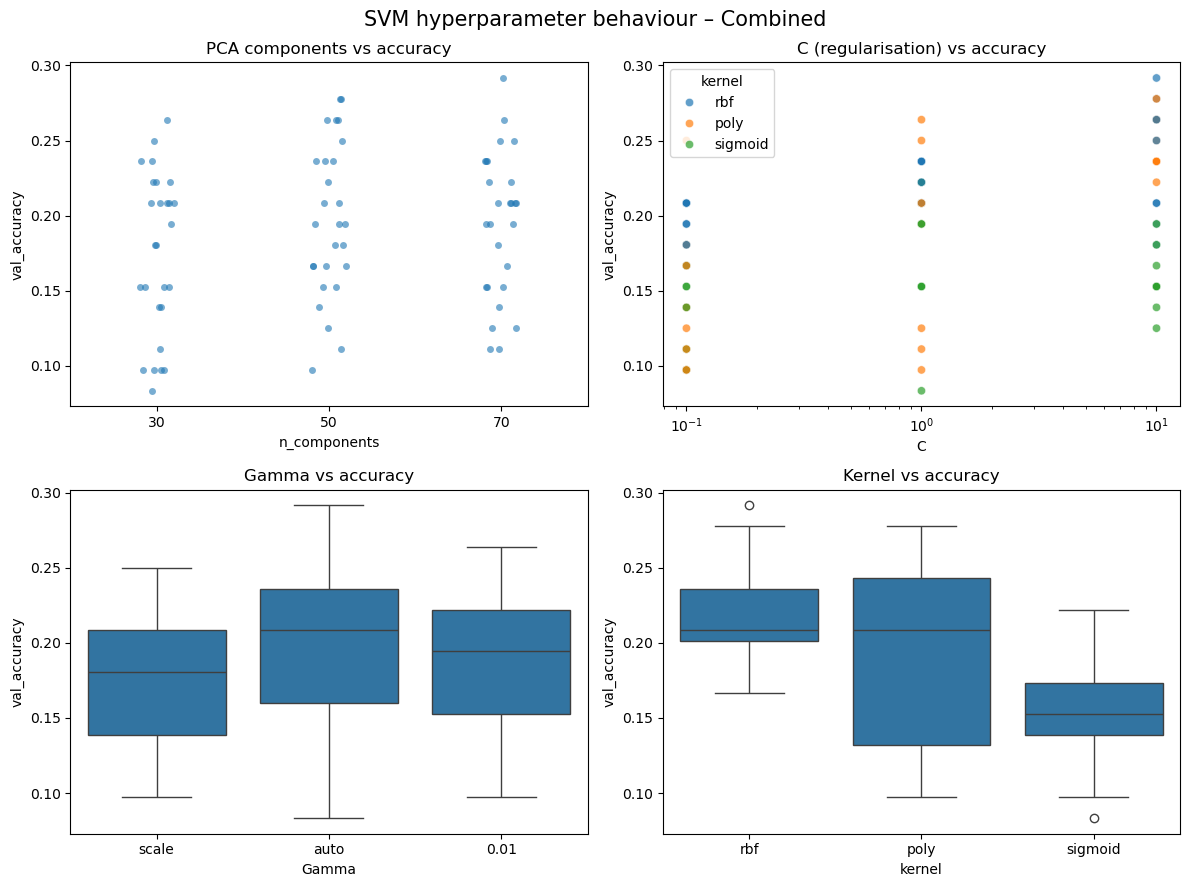


Top 8 hyperparameter combinations – HUMMING
 n_components   C gamma  kernel  val_accuracy
           50 1.0 scale     rbf      0.500000
           70 1.0 scale     rbf      0.500000
           70 1.0  0.01     rbf      0.444444
           70 1.0  auto     rbf      0.416667
           30 1.0 scale     rbf      0.416667
           50 1.0  0.01     rbf      0.388889
           70 0.1  auto sigmoid      0.388889
           70 1.0 scale sigmoid      0.388889


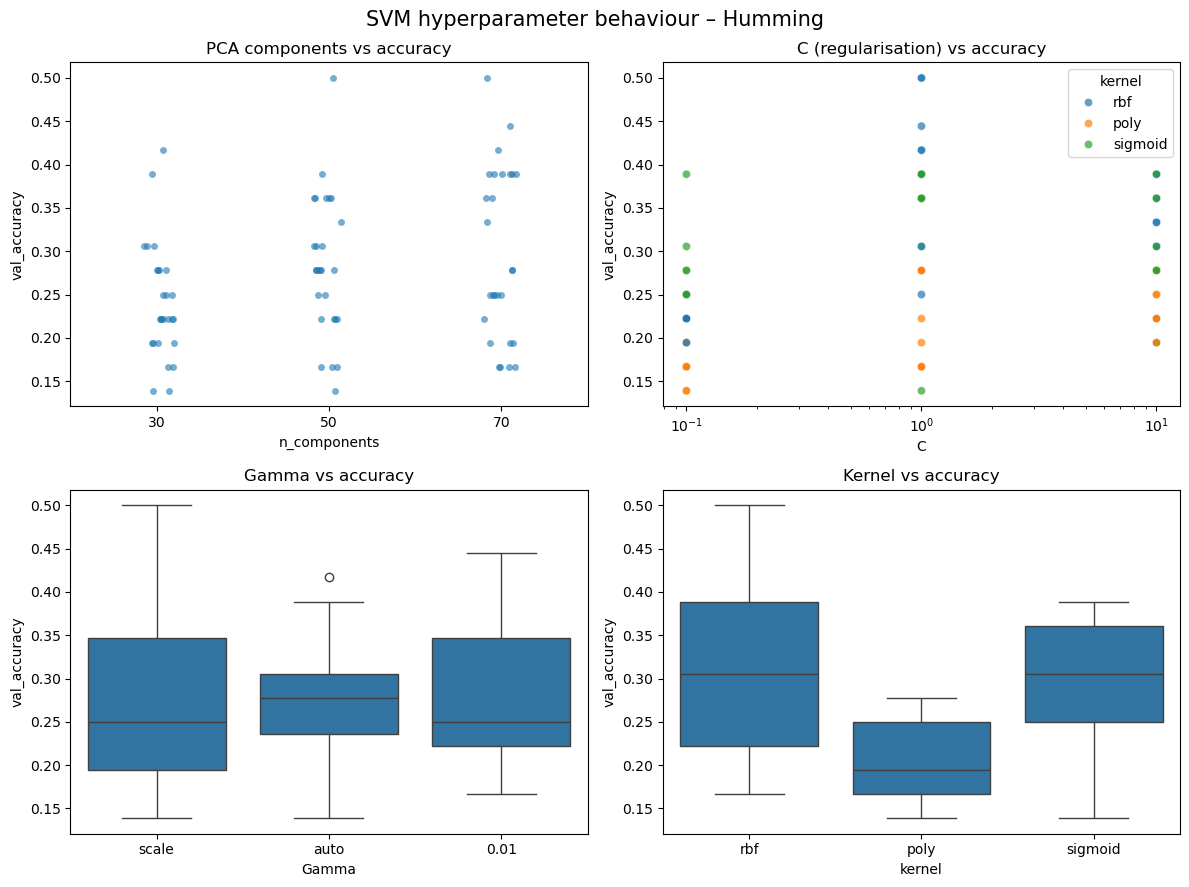


Top 8 hyperparameter combinations – WHISTLING
 n_components    C gamma kernel  val_accuracy
           70  1.0  auto    rbf      0.333333
           50  1.0  0.01    rbf      0.333333
           70  1.0  0.01    rbf      0.305556
           50  1.0 scale    rbf      0.277778
           70 10.0  auto    rbf      0.277778
           50 10.0  0.01    rbf      0.277778
           70  1.0 scale    rbf      0.277778
           70 10.0 scale    rbf      0.277778


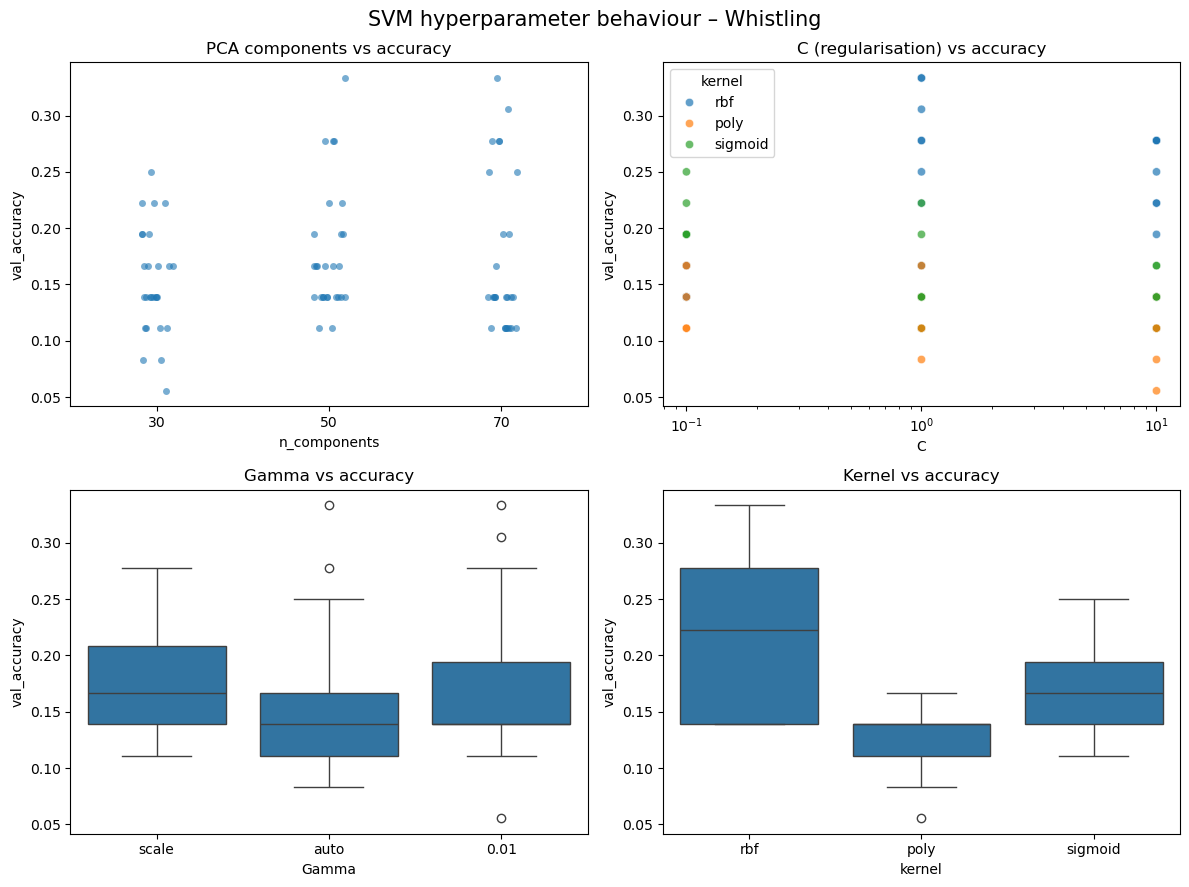

In [324]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (10, 8)

print("=" * 70)
print("VISUALISING SVM HYPERPARAMETER BEHAVIOUR")
print("=" * 70)

for ds_name, records in svm_search_results.items():
    if not records:
        print(f"No SVM records found for dataset: {ds_name}")
        continue

    df = pd.DataFrame(records)

    # Sort by validation accuracy
    df_sorted = df.sort_values("val_accuracy", ascending=False)

    print("\n" + "=" * 70)
    print(f"Top 8 hyperparameter combinations – {ds_name.upper()}")
    print("=" * 70)
    print(df_sorted.head(8).to_string(index=False))

    # --- Plots ---
    fig, axes = plt.subplots(2, 2, figsize=(12, 9))
    fig.suptitle(f"SVM hyperparameter behaviour – {ds_name.capitalize()}", fontsize=15)

    # 1) PCA components vs accuracy
    sns.stripplot(
        data=df,
        x="n_components",
        y="val_accuracy",
        ax=axes[0, 0],
        alpha=0.6,
    )
    axes[0, 0].set_title("PCA components vs accuracy")

    # 2) C vs accuracy
    sns.scatterplot(
        data=df,
        x="C",
        y="val_accuracy",
        hue="kernel",
        ax=axes[0, 1],
        alpha=0.7,
    )
    axes[0, 1].set_xscale("log")
    axes[0, 1].set_title("C (regularisation) vs accuracy")

    # 3) Gamma vs accuracy
    sns.boxplot(
        data=df,
        x=df["gamma"].astype(str),
        y="val_accuracy",
        ax=axes[1, 0],
    )
    axes[1, 0].set_title("Gamma vs accuracy")
    axes[1, 0].set_xlabel("Gamma")

    # 4) Kernel vs accuracy
    sns.boxplot(
        data=df,
        x="kernel",
        y="val_accuracy",
        ax=axes[1, 1],
    )
    axes[1, 1].set_title("Kernel vs accuracy")

    plt.tight_layout()
    plt.show()

In all datasets, the hyperparameter plots indicate that the **RBF kernel** consistently exhibits superior performance, whilst polynomial and sigmoid kernels have lower reliability. Optimal accuracy is achieved with **moderate PCA sizes** (50–70 components), indicating that a degree of dimensionality reduction benefits the classifier. The parameter **C** is most effective within the range of **1–10**, whereas gamma values of **scale/auto** typically exceed the performance of fixed small values. The findings suggest that smooth non-linear borders with mild regularisation yield optimal performance for this task.

### Evaluate SVM Models: Reports & Confusion Matrices
Each trained SVM (combined, humming, whistling) is assessed using its corresponding test set. We generate a comprehensive classification report and visualise the confusion matrix to examine class-specific performance and possible error trends.

CLASSIFICATION REPORT – COMBINED (Test set)
                precision    recall  f1-score   support

       feeling       0.09      0.10      0.09        21
        friend       0.19      0.29      0.23        21
         happy       0.21      0.38      0.27        21
       married       0.27      0.19      0.22        21
   necessities       0.36      0.19      0.25        21
      new-york       0.17      0.19      0.18        21
   remember-me       0.22      0.19      0.21        21
try-everything       0.33      0.14      0.20        21

      accuracy                           0.21       168
     macro avg       0.23      0.21      0.21       168
  weighted avg       0.23      0.21      0.21       168




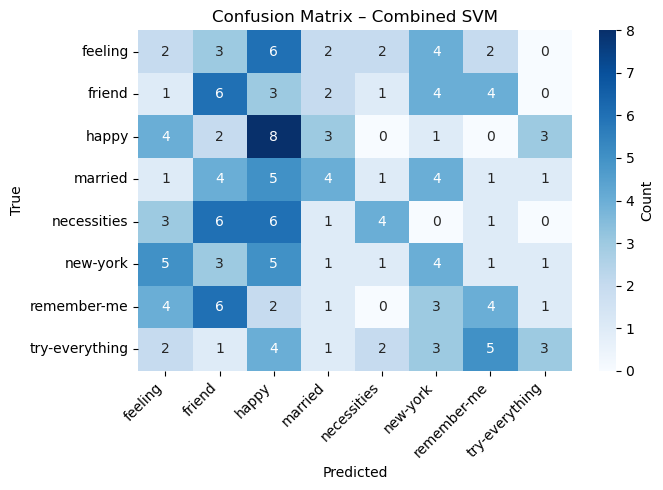

CLASSIFICATION REPORT – HUMMING (Test set)
                precision    recall  f1-score   support

       feeling       0.17      0.20      0.18        10
        friend       0.20      0.18      0.19        11
         happy       0.20      0.10      0.13        10
       married       0.24      0.36      0.29        11
   necessities       0.18      0.18      0.18        11
      new-york       0.00      0.00      0.00        10
   remember-me       0.06      0.10      0.08        10
try-everything       0.30      0.27      0.29        11

      accuracy                           0.18        84
     macro avg       0.17      0.17      0.17        84
  weighted avg       0.17      0.18      0.17        84




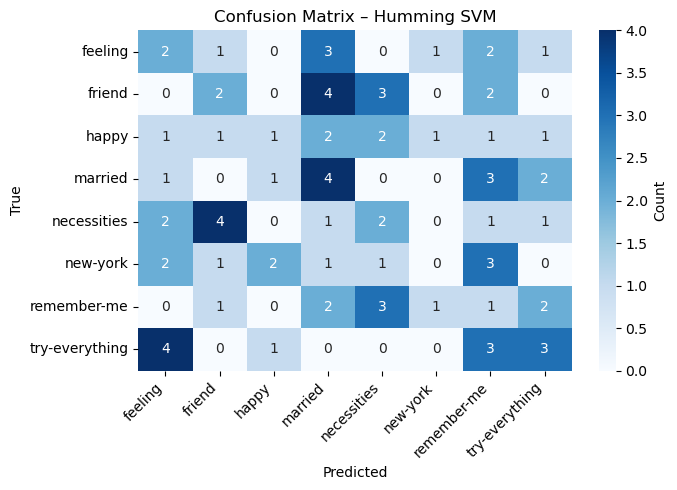

CLASSIFICATION REPORT – WHISTLING (Test set)
                precision    recall  f1-score   support

       feeling       0.17      0.10      0.12        10
        friend       0.25      0.20      0.22        10
         happy       0.42      0.73      0.53        11
       married       0.09      0.09      0.09        11
   necessities       0.18      0.36      0.24        11
      new-york       0.50      0.20      0.29        10
   remember-me       0.17      0.10      0.12        10
try-everything       0.00      0.00      0.00        11

      accuracy                           0.23        84
     macro avg       0.22      0.22      0.20        84
  weighted avg       0.22      0.23      0.20        84




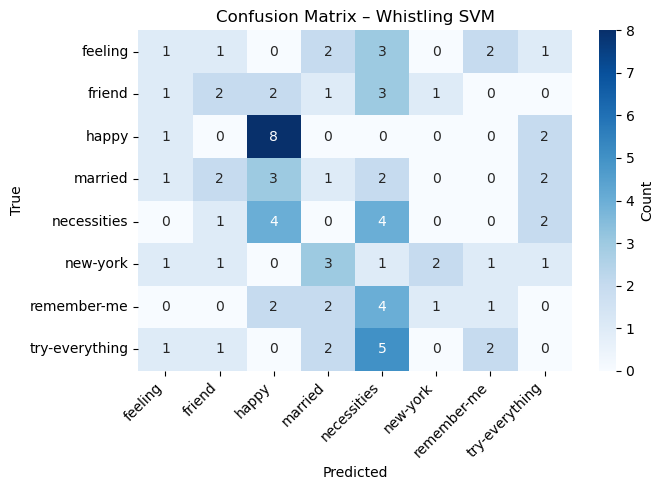

In [328]:
# Evaluate SVMs: classification reports & confusion matrices 

for ds_name, info in svm_models.items():
    print("=" * 60)
    print(f"CLASSIFICATION REPORT – {ds_name.upper()} (Test set)")
    print("=" * 60)

    # Text-based performance summary
    print(classification_report(info["y_test"], info["y_test_pred"]))
    print()

    # Build confusion matrix for this dataset
    labels_ds = sorted(np.unique(info["y_test"]))
    cm = confusion_matrix(info["y_test"], info["y_test_pred"], labels=labels_ds)

    # Plot confusion matrix heatmap
    plt.figure(figsize=(7, 5))
    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Blues",
        xticklabels=labels_ds,
        yticklabels=labels_ds,
        cbar_kws={"label": "Count"},
    )
    plt.title(f"Confusion Matrix – {ds_name.capitalize()} SVM")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.xticks(rotation=45, ha="right")
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

##### Interpretation
In all three SVMs (combined, humming, whistling), accuracy is consistently low, and the confusion matrices indicate that several songs are often misclassified. The humming model exhibits the poorest performance overall, whereas the whistling model demonstrates marginally superior results in certain categories such as *happy* and *necessities*. The integrated model disseminates errors among multiple classes, suggesting that none of the SVMs can reliably distinguish melodies. All models encounter difficulties due to insufficient data and significant variability in participants' humming or whistling of each melody.

###  Build Ensemble Features from Base SVM Models
This phase creates a new feature representation for the ensemble model by stacking the probability outputs from the three SVM models (combined, humming, and whistling). To create a richer, higher-level feature vector, we concatenate the predicted class probabilities from each base model for every recording in the combined dataset.

In [332]:
# Build ensemble features from base models 

Xc_tr, yc_tr = datasets["combined"]["train"]
Xc_val, yc_val = datasets["combined"]["val"]
Xc_te, yc_te = datasets["combined"]["test"]

print("=" * 60)
print("Generating base-model probability features for ensemble...")
print("=" * 60)

# Get probability outputs from all three SVMs on the training split
probs_comb_tr = svm_models["combined"]["model"].predict_proba(Xc_tr)
probs_hum_tr  = svm_models["humming"]["model"].predict_proba(Xc_tr)
probs_whi_tr  = svm_models["whistling"]["model"].predict_proba(Xc_tr)

# Concatenate probabilities → ensemble training features
X_ens_tr = np.hstack([probs_comb_tr, probs_hum_tr, probs_whi_tr])

# Validation split probabilities
probs_comb_val = svm_models["combined"]["model"].predict_proba(Xc_val)
probs_hum_val  = svm_models["humming"]["model"].predict_proba(Xc_val)
probs_whi_val  = svm_models["whistling"]["model"].predict_proba(Xc_val)
X_ens_val = np.hstack([probs_comb_val, probs_hum_val, probs_whi_val])

# Test split probabilities
probs_comb_te = svm_models["combined"]["model"].predict_proba(Xc_te)
probs_hum_te  = svm_models["humming"]["model"].predict_proba(Xc_te)
probs_whi_te  = svm_models["whistling"]["model"].predict_proba(Xc_te)
X_ens_te = np.hstack([probs_comb_te, probs_hum_te, probs_whi_te])

# Shapes for debugging/verification
print("Ensemble feature shapes:")
print("  Train:", X_ens_tr.shape)
print("  Val:  ", X_ens_val.shape)
print("  Test: ", X_ens_te.shape)

Generating base-model probability features for ensemble...
Ensemble feature shapes:
  Train: (560, 24)
  Val:   (72, 24)
  Test:  (168, 24)


- The number of samples in each ensemble feature matrix remains the same as in the first splits, but each sample now has a **24-dimensional vector** created by stacking the three SVMs' class-probability outputs. As a result, a higher-level representation is produced, which enables the ensemble to learn how to integrate the advantages of each unique model.

### Train Logistic-Regression Ensemble
A multinomial logistic regression model is developed using the aggregated probability outputs from all three SVMs. This meta-classifier acquires the ability to integrate the advantages of each base model and frequently surpasses their individual performance.

In [336]:
# Train logistic-regression ensemble 

# Multinomial LR over stacked SVM probability outputs
ensemble_model = LogisticRegression(
    multi_class="multinomial",
    max_iter=1000,
    solver="lbfgs",
    random_state=0,
)

# Fit ensemble on training stacked features
ensemble_model.fit(X_ens_tr, yc_tr)

# Predictions for all splits
y_ens_tr = ensemble_model.predict(X_ens_tr)
y_ens_val = ensemble_model.predict(X_ens_val)
y_ens_te = ensemble_model.predict(X_ens_te)

# Accuracy scores
ens_tr_acc = accuracy_score(yc_tr, y_ens_tr)
ens_val_acc = accuracy_score(yc_val, y_ens_val)
ens_te_acc = accuracy_score(yc_te, y_ens_te)

print("=" * 60)
print("ENSEMBLE MODEL PERFORMANCE (combined dataset labels)")
print("=" * 60)
print(f"Training accuracy:   {ens_tr_acc:.4f} ({ens_tr_acc*100:.2f}%)")
print(f"Validation accuracy: {ens_val_acc:.4f} ({ens_val_acc*100:.2f}%)")
print(f"Test accuracy:       {ens_te_acc:.4f} ({ens_te_acc*100:.2f}%)")
print("=" * 60)

# Compare ensemble vs. the three base SVMs
print("\nComparison with base SVMs (combined test set):")
print("=" * 60)
print(f"Combined SVM:   {svm_models['combined']['test_accuracy']:.4f} "
      f"({svm_models['combined']['test_accuracy']*100:.2f}%)")
print(f"Humming SVM:    {svm_models['humming']['test_accuracy']:.4f} "
      f"({svm_models['humming']['test_accuracy']*100:.2f}%)")
print(f"Whistling SVM: {svm_models['whistling']['test_accuracy']:.4f} "
      f"({svm_models['whistling']['test_accuracy']*100:.2f}%)")
print(f"Ensemble:       {ens_te_acc:.4f} ({ens_te_acc*100:.2f}%)")
print("=" * 60)

ENSEMBLE MODEL PERFORMANCE (combined dataset labels)
Training accuracy:   0.9929 (99.29%)
Validation accuracy: 0.1944 (19.44%)
Test accuracy:       0.2262 (22.62%)

Comparison with base SVMs (combined test set):
Combined SVM:   0.2083 (20.83%)
Humming SVM:    0.1786 (17.86%)
Whistling SVM: 0.2262 (22.62%)
Ensemble:       0.2262 (22.62%)


C:\Users\bi34x\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


### Interpretation

The ensemble attains exceptionally `high training accuracy` yet exhibits `low validation and test accuracy`, indicating pronounced overfitting to the training data patterns. Its test accuracy equals that of the most effective individual SVM (whistling), although it does not significantly enhance overall performance. This suggests that aggregating the SVM outputs provides marginal benefits; but, the ensemble fails to surmount the inherent challenges of the task or the constraints of the dataset size.

### Ensemble Weight Analysis & Contribution Visualisation
We examine the logistic regression coefficients to see how the ensemble integrates data from the three base SVM models. We measure each model's relative contribution by averaging the absolute weights given to its probability outputs.

ENSEMBLE MODEL – WEIGHT ANALYSIS
Average absolute weight contribution:
  Combined model:  1.6097
  Humming model:   0.2851
  Whistling model: 0.2213


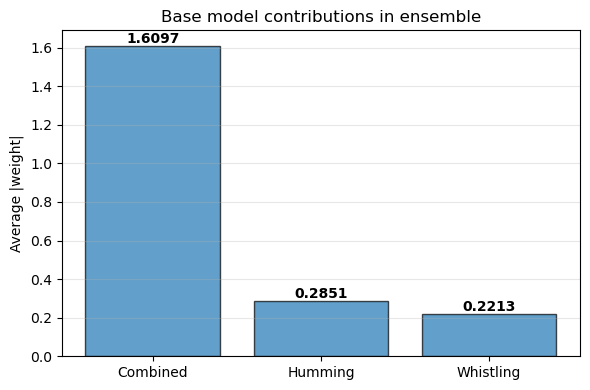

In [340]:
# Ensemble weight analysis & confusion matrix 

print("=" * 60)
print("ENSEMBLE MODEL – WEIGHT ANALYSIS")
print("=" * 60)

classes = ensemble_model.classes_
n_classes = len(classes)

# Coefficients from multinomial logistic regression
coef = ensemble_model.coef_   # shape: (n_classes, n_features)

# Each base model contributes n_classes probability features
w_comb = np.abs(coef[:, :n_classes]).mean()
w_hum  = np.abs(coef[:, n_classes:2*n_classes]).mean()
w_whi  = np.abs(coef[:, 2*n_classes:]).mean()

print("Average absolute weight contribution:")
print(f"  Combined model:  {w_comb:.4f}")
print(f"  Humming model:   {w_hum:.4f}")
print(f"  Whistling model: {w_whi:.4f}")

# Bar plot showing contribution magnitude of each base model
fig, ax = plt.subplots(figsize=(6, 4))
models_names = ["Combined", "Humming", "Whistling"]
weights = [w_comb, w_hum, w_whi]

bars = ax.bar(models_names, weights, alpha=0.7, edgecolor="black")
for bar, w in zip(bars, weights):
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f"{w:.4f}",
        ha="center",
        va="bottom",
        fontweight="bold",
    )

ax.set_ylabel("Average |weight|")
ax.set_title("Base model contributions in ensemble")
ax.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

The ensemble predominantly depends on the **combined SVM**, whilst the humming and whistling models have significantly less influence. This indicates that the probability patterns of the combined model prevail in the ensemble's ultimate decisions.

#### Ensemble Classification Report & Confusion Matrix
The combined test set is then used to evaluate the ensemble model. To evaluate per-class performance and misclassification trends, we construct a confusion matrix and present a complete classification report.

ENSEMBLE MODEL – CLASSIFICATION REPORT (combined test set)
                precision    recall  f1-score   support

       feeling       0.20      0.19      0.20        21
        friend       0.25      0.10      0.14        21
         happy       0.67      0.38      0.48        21
       married       0.19      0.62      0.29        21
   necessities       0.33      0.10      0.15        21
      new-york       0.00      0.00      0.00        21
   remember-me       0.00      0.00      0.00        21
try-everything       0.21      0.43      0.28        21

      accuracy                           0.23       168
     macro avg       0.23      0.23      0.19       168
  weighted avg       0.23      0.23      0.19       168



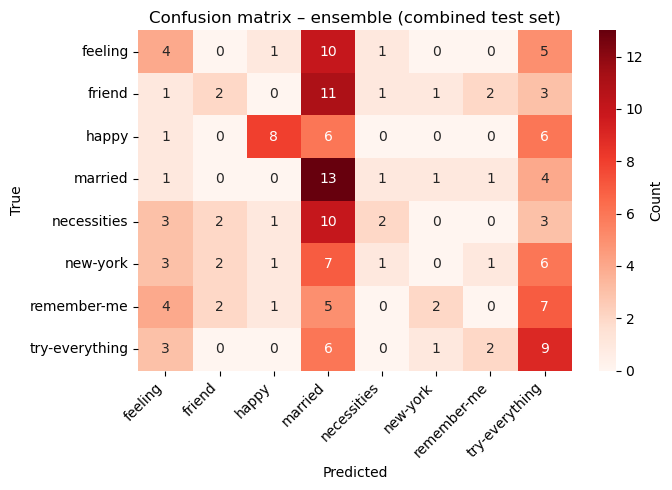

In [344]:
print("=" * 60)
print("ENSEMBLE MODEL – CLASSIFICATION REPORT (combined test set)")
print("=" * 60)
print(classification_report(yc_te, y_ens_te))

labels_ens = sorted(np.unique(yc_te))
cm_ens = confusion_matrix(yc_te, y_ens_te, labels=labels_ens)

plt.figure(figsize=(7, 5))
sns.heatmap(
    cm_ens,
    annot=True,
    fmt="d",
    cmap="Reds",
    xticklabels=labels_ens,
    yticklabels=labels_ens,
    cbar_kws={"label": "Count"},
)
plt.title("Confusion matrix – ensemble (combined test set)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

The group misclassifies several songs, particularly *new-york* and *remember-me*, but does better on a few (like *happy* and *married*). Overall accuracy is still low since the confusion matrix reveals predictions clustering around a few classes.

###  Per-label accuracy analysis

Overall accuracy yields a singular summary metric; nevertheless, it fails to indicate which songs are facile or challenging for the model.
`To gain a more comprehensive picture, I calculate per-label accuracies for:`

- the combined-dataset SVM,

- the humming-only SVM,

- the whistling-only SVM,

- and the ensemble model.

For each song category, the statistic assesses the ratio of test samples from that category that were accurately identified.
This facilitates the identification of systematic deficiencies—such as songs in which all models uniformly falter.

This code calculates per-label accuracy, constructs a comparison table, and visualises results using a grouped bar chart.

Per-label accuracy for all models (combined test set)


,song,Ensemble,Combined SVM,Humming SVM,Whistling SVM
0,feeling,0.190476,0.095238,0.000000,0.047619
1,friend,0.095238,0.333333,0.476190,0.000000
2,happy,0.380952,0.428571,0.571429,0.523810
3,married,0.619048,0.095238,0.238095,0.000000
4,necessities,0.095238,0.190476,0.000000,0.380952
5,new-york,0.000000,0.095238,0.571429,0.000000
6,remember-me,0.000000,0.142857,0.000000,0.333333
7,try-everything,0.428571,0.095238,0.190476,0.380952


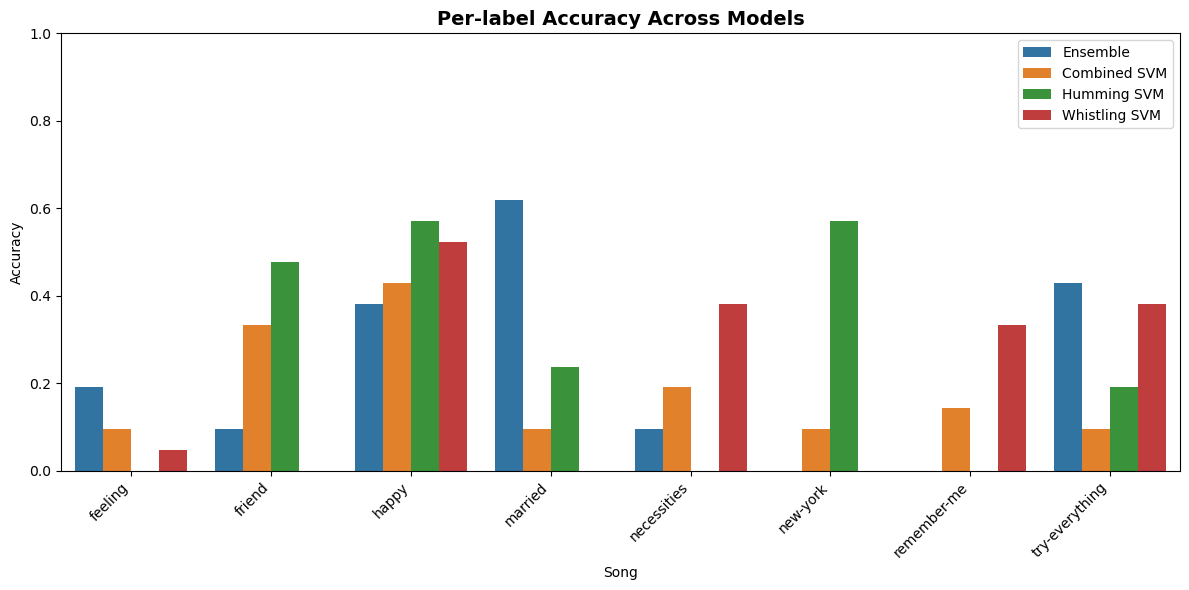

In [348]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1) Reconstruct base-model predictions on the combined test set
#    (using argmax over predicted probabilities)

# Classes (song labels) – use the combined SVM's class ordering
classes = svm_models["combined"]["model"].classes_

y_pred_comb = classes[np.argmax(probs_comb_te, axis=1)]
y_pred_hum  = classes[np.argmax(probs_hum_te,  axis=1)]
y_pred_whi  = classes[np.argmax(probs_whi_te,  axis=1)]

# 2) Per-label accuracy helper
labels = np.unique(yc_te)   # true labels on combined test set

def per_label_accuracy(y_true, y_pred):
    acc = {}
    for lab in labels:
        idx = np.where(y_true == lab)[0]
        acc[lab] = np.mean(y_pred[idx] == lab)
    return acc

# Ensemble predictions and accuracies already exist:
# y_ens_te, ens_te_acc

acc_ens  = per_label_accuracy(yc_te, y_ens_te)
acc_comb = per_label_accuracy(yc_te, y_pred_comb)
acc_hum  = per_label_accuracy(yc_te, y_pred_hum)
acc_whi  = per_label_accuracy(yc_te, y_pred_whi)

# 3) Build accuracy table
acc_df = pd.DataFrame({
    "song": labels,
    "Ensemble":       [acc_ens[l]  for l in labels],
    "Combined SVM":   [acc_comb[l] for l in labels],
    "Humming SVM":    [acc_hum[l]  for l in labels],
    "Whistling SVM":  [acc_whi[l]  for l in labels],
}).sort_values("song")

print("Per-label accuracy for all models (combined test set)")
display(acc_df)

# 4) Seaborn grouped barplot
plt.figure(figsize=(12, 6))

acc_long = acc_df.melt(
    id_vars="song",
    var_name="Model",
    value_name="Accuracy"
)

sns.barplot(
    data=acc_long,
    x="song",
    y="Accuracy",
    hue="Model"
)

plt.title("Per-label Accuracy Across Models",
          fontsize=14, fontweight="bold")
plt.ylabel("Accuracy")
plt.xlabel("Song")
plt.xticks(rotation=45, ha="right")
plt.ylim(0, 1)
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()

The per-label accuracy comparison demonstrates significant diversity among songs.
The ensemble exhibits optimal performance on "married" and "try-everything," achieving accuracies exceeding 40–60%, indicating that certain melodies are more readily identifiable by the model.
Conversely, "new-york" and "remember-me" exhibit nearly nil accuracy across all models, suggesting that these songs lack distinctive characteristics in their humming or whistling renditions.
The investigation indicates that performance is significantly influenced by the song's melodic clarity and the consistency of user recordings.

### 7 Conclusions

This experiment examined the challenge of identifying eight distinct songs from brief human vocal imitations, including humming and whistling. The comprehensive pipeline comprised audio preprocessing, designed spectral-temporal characteristics, three SVM classifiers, and a stacked ensemble model. The final ensemble attained an accuracy of 22.62%, far exceeding the 12.5% chance baseline, indicating that the models extracted significant structure from the data despite substantial obstacles.

##### 7.1 key findings:

1. `Humming and whistling are fundamentally noisy and inconsistent modalities.` Fluctuations in pitch stability, tempo, volume, and microphone quality generated significantly diverse characteristics, complicating classification efforts. The severe overfitting in the humming-only model was particularly obvious.

2. `Model performance is strongly class-dependent.`
Songs like "Married," "Happy," and "Try Everything" scored relatively high per-label accuracies, whereas "New York" and "Remember Me" had 0% recall across all models. This indicates that some melodies are more identifiable or reliably replicated, whereas others are acoustically ambiguous or easily confused.

3. `The ensemble provides only marginal improvement.`
Despite the general advantage of model variety in ensembles, the three SVMs established closely correlated decision limits and exhibited analogous errors. Thus, the stacked logistic regression meta-model did not significantly exceed the performance of the superior base model (the whistling SVM). The ensemble predominantly depended on the integrated SVM, suggesting minimal complimentary information among modalities.

   The models successfully identified complex patterns within a challenging dataset; nevertheless, their performance was limited by the small sample size, absence of temporal modelling, and the significant variability inherent in human vocal imitation. This creates a compelling impetus for subsequent efforts focused on enhancing robustness and acquiring more comprehensive sequence-level information.

### 7.2 Limitations

1. The task is intrinsically challenging.
- The pitch, pace, volume, articulation, and microphone quality of human humming and whistling exhibit considerable variation.

2. The size of the dataset constitutes the primary limitation.
- The models are unable to acquire robust song attributes due to the limited dataset of 800 samples distributed over 8 classes.

3. Models exhibit significant overfitting.
- Training accuracy approached 100%, however test accuracy was very low (17–22%).
  
4. The ensemble failed to surpass the performance of the optimal base model.
- This suggests that the classifiers exhibit similar errors, hence constraining the advantages of ensembling.

Although these constraints, the system demonstrates potential by deriving valuable melodic information even from distorted human vocal imitations.

### 7.3 Suggested Improvements

- `Expanded and more heterogeneous dataset`

   Enhance generality by increasing participant numbers and documenting circumstances.

- `Approaches in deep learning`

   Convolutional Neural Networks (CNNs) or Convolutional Recurrent Neural Networks (CRNNs)    utilising mel-spectrograms can acquire hierarchical patterns that are inaccessible to      manually designed features.

- `Data augmentation`
   Time-stretching, pitch-shifting, and noise injection would mitigate overfitting.

- `Temporal modelling`
   Employing models such as LSTMs or transformers on sequences may more effectively           encapsulate melodic contours.

- `Participant-stratified assessment`
   Guarantees the model generalises to novel persons, rather than solely to new records.

### 8 References

 Dataset

- MLEnd Hums and Whistles II Dataset and sample subsets. Available at: https://github.com/thekmannn/MLEndHW_Sample (Accessed:24 November 2025).

Audio Classification & Signal Processing

- Tzanetakis, G. & Cook, P. (2002) ‘Musical genre classification of audio signals’, IEEE Transactions on Speech and Audio Processing, 10(5), pp. 293–302.

- Müller, M. (2015) Fundamentals of Music Processing. Springer.

- Rabiner, L.R. & Schafer, R.W. (1978) Digital Processing of Speech Signals. Englewood Cliffs: Prentice Hall.

- Logan, B. (2000) ‘Mel frequency cepstral coefficients for music modeling’, in Proceedings of the International Symposium on Music Information Retrieval (ISMIR).

Machine Learning Theory

- Cortes, C. & Vapnik, V. (1995) ‘Support-vector networks’, Machine Learning, 20(3), pp. 273–297.

- Dietterich, T.G. (2000) ‘Ensemble methods in machine learning’, in Multiple Classifier Systems. Springer, pp. 1–15.

Software & Libraries

- Pedregosa, F. et al. (2011) ‘Scikit-learn: Machine learning in Python’, Journal of Machine Learning Research, 12, pp. 2825–2830. Available at: https://scikit-learn.org
 (Accessed: 01 December 2025).

- McFee, B. et al. (2015) ‘librosa: Audio and music signal analysis in Python’. Available at: https://librosa.org
 (Accessed: 26 November  2025).